# **Project Objectives and Goals**

**Analyze Keyword Impact:** Assess how specific keywords influence
consumer interest across various sectors.

**Understand Consumer Behavior:** Identify consumer behavior patterns and sentiment based on keyword trends.

**Keyword Combination Analysis:** Allow users to explore any combination of keywords across multiple sectors.

**Predict Future Trends:** Forecast trends by analyzing yearly and monthly search patterns for user-provided keywords.





In [ ]:
pip install pytrends

## Data Collection

In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [ ]:
# Initialize Pytrends
pytrends = TrendReq(hl='en-IN', tz=330)

# here The parameters hl='en-IN' set the language to English(India) and tz=330 the time zone to GMT+5:30

In [ ]:
def get_trends_data(keywords, timeframe='today 5-y', geo='IN'):
    pytrends.build_payload(keywords, cat=0, timeframe=timeframe, geo=geo, gprop='')
    data = pytrends.interest_over_time()
    if not data.empty:
        data = data.drop(labels=['isPartial'], axis='columns')
    return data

def save_data_to_csv(data, filename):
    data.to_csv(filename, index=True)
    print(f"Data saved to {filename}")

In [ ]:
def gather_and_save_trends_data(keywords):
    if isinstance(keywords, str):              #  --> to convert str into list
        keywords = [keywords]

    all_data = []
    for keyword in keywords:
        yearly_data = []
        for year in range(2019, 2024):  # Last 5 years
            timeframe = f'{year}-01-01 {year}-12-31'
            data = get_trends_data([keyword], timeframe=timeframe)
            if not data.empty:
                data = data.rename(columns={'interest': keyword})
                yearly_data.append(data)
            time.sleep(1)  # To prevent hitting API rate limits

        combined_yearly_data = pd.concat(yearly_data, axis=0)
        all_data.append(combined_yearly_data)

    # Combine all keyword data into a single DataFrame
    final_data = pd.concat(all_data, axis=1)
    save_data_to_csv(final_data, 'trends_last_5_years_combined.csv')

In [ ]:
# passing keywords to get the data
keywords = ['Samsung', 'nokia', 'iphone']
gather_and_save_trends_data(keywords)

Data saved to trends_last_5_years_combined.csv


#  Load Dataset

In [ ]:
data = pd.read_csv('trends_last_5_years_combined.csv',  parse_dates=['date'])

In [ ]:
data.head(5)

,date,Samsung,nokia,iphone
0,2018-12-30,60,90,41
1,2019-01-06,60,83,37
2,2019-01-13,67,86,35
3,2019-01-20,69,84,39
4,2019-01-27,88,79,37


In [ ]:
# Check for missing values
print(data.isnull().sum())

date       0
Samsung    0
nokia      0
iphone     0
dtype: int64


In [ ]:
# If there are any missing values, handle them
data.fillna(0, inplace=True)

In [ ]:
print(data.describe())

                      date     Samsung       nokia      iphone
count                  265  265.000000  265.000000  265.000000
mean   2021-06-28 09:36:00   74.094340   75.671698   47.992453
min    2018-12-30 00:00:00   32.000000   38.000000   26.000000
25%    2020-03-29 00:00:00   68.000000   67.000000   42.000000
50%    2021-06-27 00:00:00   75.000000   78.000000   46.000000
75%    2022-09-25 00:00:00   82.000000   86.000000   50.000000
max    2023-12-31 00:00:00  100.000000  100.000000  100.000000
std                    NaN   12.795691   13.407432   12.221749


In [ ]:
# line plot
fig = px.line(data, x='date', y=data.columns[1:], title='Google Trends Over the Last 5 Years',
              labels={'date': 'Date', 'value': 'Interest Level'},
              markers=True)

# Show the plot
fig.show()

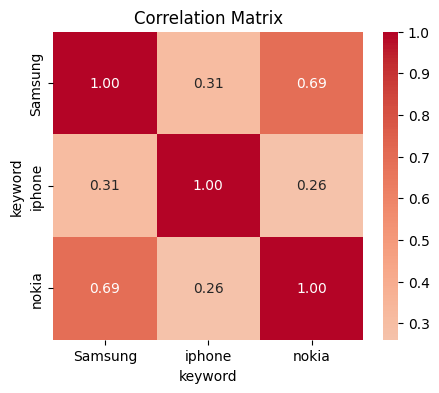

In [ ]:
# Correlation matrix
correlation_matrix = heatmap_matrix.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Heatmap plot
heatmap_data = data.melt(id_vars=['date'], var_name='keyword', value_name='interest')   #Melt the data to long format

# Create a pivot table to get wide format for heatmap
heatmap_matrix = heatmap_data.pivot_table(index='date', columns='keyword', values='interest')

fig = px.imshow(heatmap_matrix, labels=dict(x='Date', y='Keyword', color='Interest Level'),
                title='Interest Levels Heatmap',color_continuous_scale='Viridis' )

fig.update_layout(xaxis_title='Date', yaxis_title='Keyword', coloraxis_colorbar=dict(title='Interest Level'),
                  xaxis_tickformat='%Y-%m')
fig.show()

In [ ]:
# Average interest for each keyword over the entire period
average_interest = data.drop(columns=['date']).mean()

# pie chart
fig = px.pie(values=average_interest, names=average_interest.index, title='Average Interest Distribution Over the Last 5 Years')
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# scatter plot for each pair of keywords
keywords = data.columns[1:]

for i in range(len(keywords) - 1):
    for j in range(i + 1, len(keywords)):
        keyword1 = keywords[i]
        keyword2 = keywords[j]

        fig = px.scatter(data, x=keyword1, y=keyword2, title=f'Relationship Between {keyword1} and {keyword2} Interest levels over time',
                         labels={keyword1: f'{keyword1} Interest Level', keyword2: f'{keyword2} Interest Level'},
                         trendline="ols", hover_name='date')
        fig.update_layout(width=800, height=600)
        fig.show()

# Analysing Seasonal trends

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1000x800 with 0 Axes>

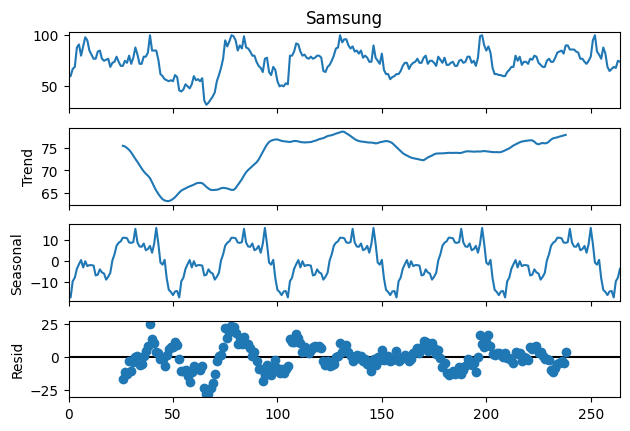

<Figure size 1000x800 with 0 Axes>

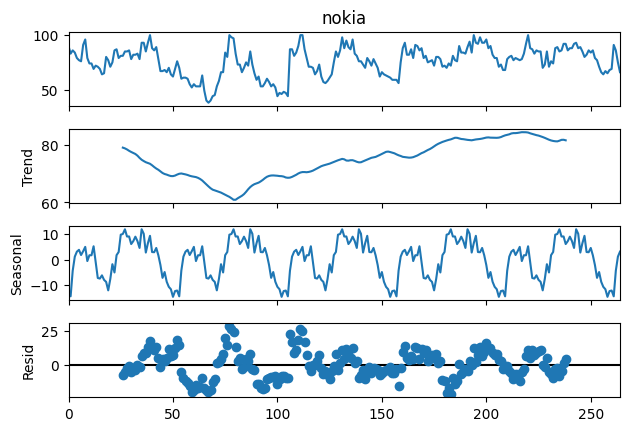

<Figure size 1000x800 with 0 Axes>

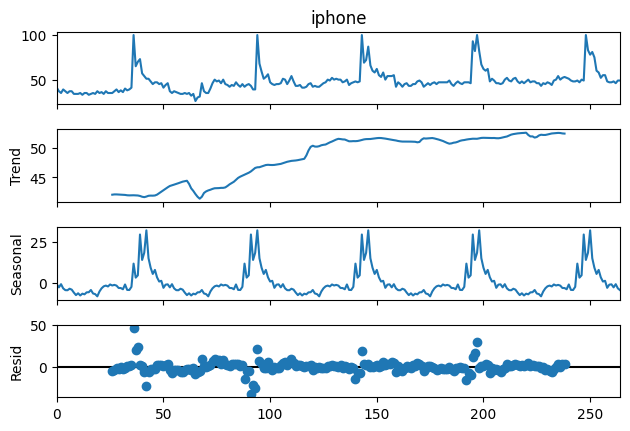

In [ ]:
for column in data.columns[1:]:
    try:
        result = seasonal_decompose(data[column], model='additive', period=52)

        plt.figure(figsize=(10, 8))
        plt.suptitle(f'Time Series Decomposition for {column}', fontsize=16)
        result.plot()
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    except Exception as e:
        print(f"An error occurred while processing {column}: {e}")

In [ ]:
# Future work:-
"""
  - Time series forecasting
  - Event impact analysis(festivals, product launches etc..)
  - Tracking of Marketing campaigns
  - Build user friendly interface
"""

'\n  - Time series forecasting \n  - Event impact analysis(festivals, product launches etc..) \n  - Tracking of Marketing campaigns \n  - Build user friendly interface\n'

In [ ]:
# Top 5 states for highest Trend
top_states = {}

for keyword in keywords:
    pytrends.build_payload([keyword], geo='IN', timeframe='today 5-y')
    interest_by_region = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True)

    top_states[keyword] = interest_by_region.sort_values(by=keyword, ascending=False).head(5)

top_states_df = pd.concat(top_states)
print(top_states_df)

                         Samsung  nokia  iphone
        geoName                                
Samsung Punjab             100.0    NaN     NaN
        Gujarat             99.0    NaN     NaN
        Jammu & Kashmir     95.0    NaN     NaN
        Puducherry          95.0    NaN     NaN
        Daman and Diu       92.0    NaN     NaN
nokia   Odisha               NaN  100.0     NaN
        Tamil Nadu           NaN   89.0     NaN
        Puducherry           NaN   83.0     NaN
        Kerala               NaN   77.0     NaN
        Karnataka            NaN   76.0     NaN
iphone  Punjab               NaN    NaN   100.0
        Chandigarh           NaN    NaN    90.0
        Sikkim               NaN    NaN    75.0
        Mizoram              NaN    NaN    75.0
        Delhi                NaN    NaN    74.0
